In [1]:
!jt -t chesterish
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
loadpath = "./"

def getHeader(loadpath):

        header = pd.read_excel(loadpath + "no_trade.xls")
        header = header.set_index("date")
        header = header.drop(["BTI", "GSK", "ITT", "TM", "UVV"], axis=1)
        try:
            header = header.drop(["Unnamed: 0"], axis=1)
        except:
            pass

        columnNames = []
        for asset in header.columns.tolist()[:-1]:
            index = list(header.columns).index(asset)
            columnNames.append(asset + "-" + asset)
            for crossAsset in header.columns[index + 1 :].tolist():
                columnNames.append(asset + "-" + crossAsset)

        columnNames.append(header.columns[-1] + "-" + header.columns[-1])
        columnNames.sort()

        return columnNames

data = pd.read_csv(loadpath + "RVOC_6m.csv", engine="python", skiprows=[1], index_col="Var1")
data = data.drop("Unnamed: 0", axis=1)
data.columns = getHeader(loadpath)
data.index = pd.to_datetime(data.index, format="%Y%m%d")

In [5]:
series = data["AAPL-AAPL"].values
plt.rcParams["font.family"] = "Times New Roman"

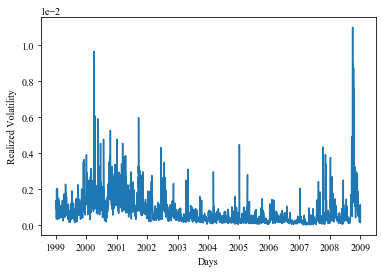

In [10]:
plt.plot(list(data.index), series)
plt.xlabel("Days")
plt.ylabel("Realized Volatility")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

In [ ]:
plot_acf(series)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("")
#plt.title("Autocorrelation Realized Daily Volatility: AAPL")
plt.show()

In [ ]:
plot_pacf(series, lags=35)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("")
#plt.title("Partial Autocorrelation Realized Daily Volatility: AAPL")
plt.show()

In [14]:
data.index[int(len(data.index)*0.8)]

Timestamp('2007-01-03 00:00:00')

In [13]:
data.index

DatetimeIndex(['1999-01-06', '1999-01-07', '1999-01-08', '1999-01-11',
               '1999-01-12', '1999-01-13', '1999-01-14', '1999-01-15',
               '1999-01-19', '1999-01-20',
               ...
               '2008-12-16', '2008-12-17', '2008-12-18', '2008-12-19',
               '2008-12-22', '2008-12-23', '2008-12-26', '2008-12-29',
               '2008-12-30', '2008-12-31'],
              dtype='datetime64[ns]', name='Var1', length=2483, freq=None)